the shortest path fromSupplier A to Retailer 2 is: [1, 3, 5]
the total cost for the shortest path is17


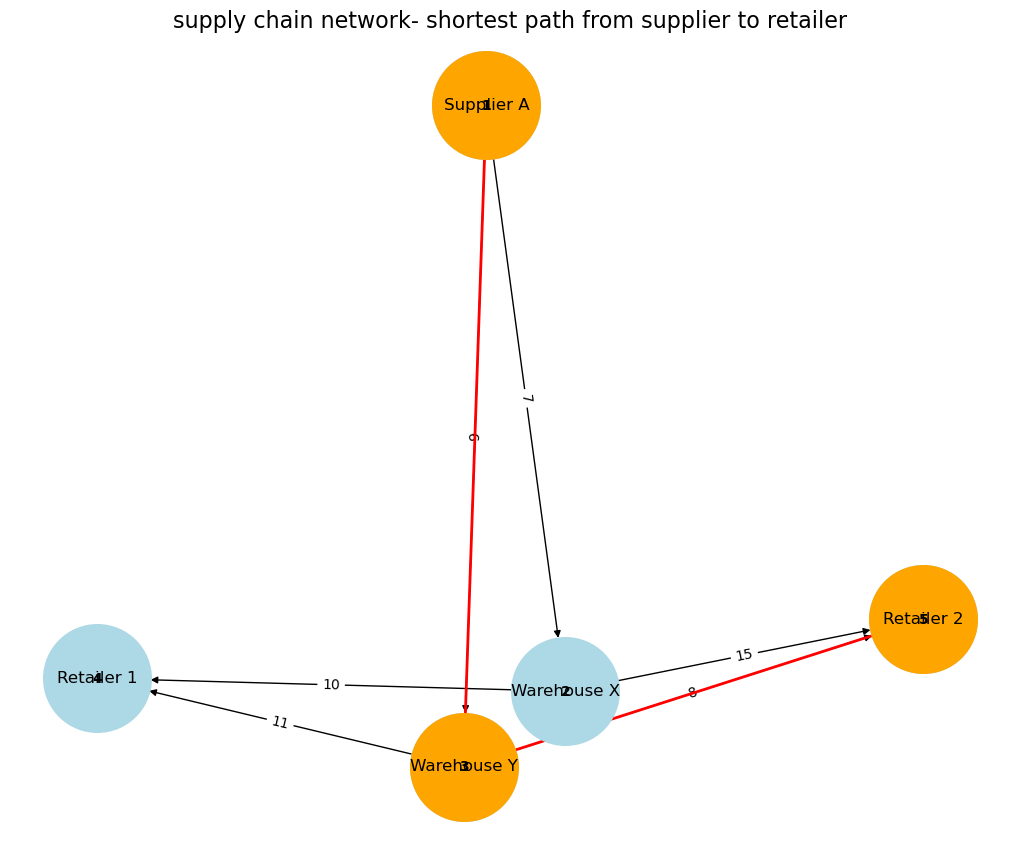

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()
nodes = {1: "Supplier A", 
          2: "Warehouse X", 
          3: "Warehouse Y", 
          4: "Retailer 1",
          5: "Retailer 2"
        }
G.add_nodes_from(nodes.keys())
edges=[
    (1,2,7),
    (1,3,9),
    (2,4,10),
    (2,5,15),
    (3,4,11),
    (3,5,8),
]
G.add_weighted_edges_from(edges)
#define start and target nodes
start_node=1
target_node=5

#find the shortest path using dijkstra's algorithm
shortest_path=nx.dijkstra_path(G,source=start_node,target=target_node,weight='weight')
shortest_path_length=nx.dijkstra_path_length(G,source=start_node,target=target_node,weight='weight')

print(f"the shortest path from{nodes[start_node]} to {nodes[target_node]} is: {shortest_path}")
print(f"the total cost for the shortest path is{shortest_path_length}")

plt.figure(figsize=(10,8))
#use spring layout to avoid node overlap
pos=nx.spring_layout(G,k=1.5,seed=42)

nx.draw(G,pos,with_labels=True,node_size=6000,node_color="lightblue",font_size=10,font_weight='bold')

node_labels={node:nodes[node] for node in G.nodes()}
nx.draw_networkx_labels(G,pos,labels=node_labels,font_size=12)

edge_labels=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

#highlight the shortest path in red
path_edges=list(zip(shortest_path,shortest_path[1:]))
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='red',width=2)

nx.draw_networkx_nodes(G,pos,nodelist=shortest_path,node_color='orange',node_size=6000)

plt.title("supply chain network- shortest path from supplier to retailer",size=16)
plt.show()